In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import pylab as pl
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter,MaxNLocator
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv('AN.csv')
energy=df.iloc[:,3:]
emean=energy.mean(axis=1)
X=df.iloc[:,0:1]
X['energy']=emean
y=df.iloc[:,1]
feature_names=['CR-IoT users','Energy level']

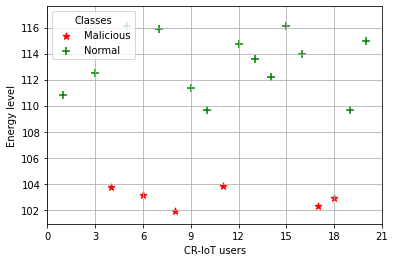

In [ ]:
fig, ax = plt.subplots()
for i in range(0, len(y)):
    if y[i]==-1:
        c1 = pl.scatter(X.CR_IoT[i],X.energy[i],c='r',    s=50,marker='*')
    elif y[i]==1:
        c2=pl.scatter(X.CR_IoT[i],X.energy[i],c='g',    s=50,marker='+')

pl.legend([c1, c2], ['Malicious', 'Normal'],loc="upper left", title="Classes")
pl.grid()
ax.set_xlabel("{}".format(feature_names[0]))
ax.set_xlim(X.CR_IoT.min()-1,X.CR_IoT.max()+1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_ylabel("{}".format(feature_names[1]))
ax.set_ylim(X.energy.min()-1,X.energy.max()+1)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
pl.show()
#ax.set_title(title)
plt.show()

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [ ]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

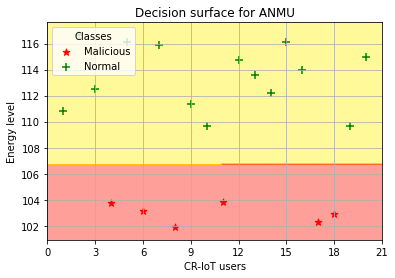

In [ ]:
model = SVC(kernel='linear')
clf = model.fit(X, y)
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface for ANMU')
# Set-up grid for plotting.
X0, X1 = X.CR_IoT, X.energy
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap='autumn', alpha=0.4)
for i in range(0, len(y)):
    if y[i]==-1:
        c1 = pl.scatter(X.CR_IoT[i],X.energy[i],c='r',    s=50,marker='*')
    elif y[i]==1:
        c2=pl.scatter(X.CR_IoT[i],X.energy[i],c='g',    s=50,marker='+')

pl.legend([c1, c2], ['Malicious', 'Normal'],loc="upper left", title="Classes")
pl.grid()
ax.set_xlabel("{}".format(feature_names[0]))
ax.set_xlim(X0.min()-1,X0.max()+1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_ylabel("{}".format(feature_names[1]))
ax.set_ylim(X1.min()-1,X1.max()+1)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#ax.set_xticks(())
#ax.set_yticks(())
ax.set_title(title)
plt.show()

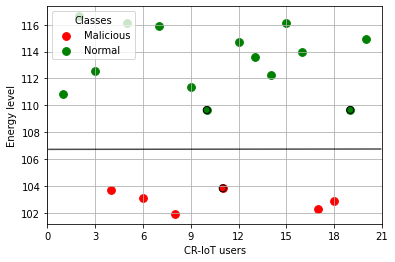

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X,y)
ax = plt.gca()

for i in range(0, len(y)):
    if y[i]==-1:
        c1 = pl.scatter(X.CR_IoT[i],X.energy[i],c='r',    s=60)
    elif y[i]==1:
        c2=pl.scatter(X.CR_IoT[i],X.energy[i],c='g',    s=60)

pl.legend([c1, c2], ['Malicious', 'Normal'],loc="upper left", title="Classes")
#pl.grid()

# plot the decision function

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 60)
yy = np.linspace(ylim[0], ylim[1], 60)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='black', levels=[0], alpha=0.7,
           linestyles=[ '-'])
# plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50,
           linewidth=1, facecolors='none', edgecolors='k')
ax.set_xlabel("{}".format(feature_names[0]))
ax.set_xlim(X.CR_IoT.min()-1,X.CR_IoT.max()+1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.set_ylabel("{}".format(feature_names[1]))
ax.set_xlim(X.CR_IoT.min()-1,X.CR_IoT.max()+1)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid()
#ax.set_title('Disicion surface for')
plt.show()